In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Optional: Set random seed for reproducibility
np.random.seed(42)


In [37]:
# Load data
data = pd.read_csv(r'C:\Users\aetpl\Downloads\Multivariate_pollution.csv\Multivariate_pollution.csv', index_col='date', parse_dates=True)
print(data.head())

                     pollution  dew  temp   press wnd_dir  wnd_spd  snow  rain
date                                                                          
2010-01-02 00:00:00      129.0  -16  -4.0  1020.0      SE     1.79     0     0
2010-01-02 01:00:00      148.0  -15  -4.0  1020.0      SE     2.68     0     0
2010-01-02 02:00:00      159.0  -11  -5.0  1021.0      SE     3.57     0     0
2010-01-02 03:00:00      181.0   -7  -5.0  1022.0      SE     5.36     1     0
2010-01-02 04:00:00      138.0   -7  -5.0  1022.0      SE     6.25     2     0


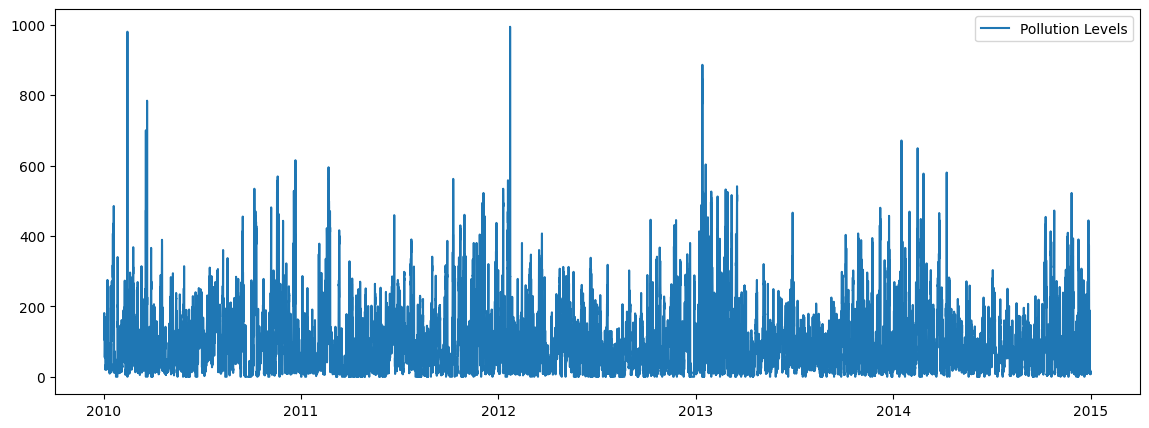

In [25]:
# Plot the data
plt.figure(figsize=(14, 5))
plt.plot(data['pollution'], label='Pollution Levels')
plt.legend()
plt.show()


In [26]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['pollution'].values.reshape(-1, 1))

In [27]:

# Define a function to create sequences for RNN
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [44]:
# Define sequence length
seq_length = 60

# Create sequences
X, y = create_sequences(scaled_data, seq_length)
print(X,y)

[[[0.12977867]
  [0.14889336]
  [0.15995976]
  ...
  [0.02716298]
  [0.02716298]
  [0.02515091]]

 [[0.14889336]
  [0.15995976]
  [0.18209256]
  ...
  [0.02716298]
  [0.02515091]
  [0.02917505]]

 [[0.15995976]
  [0.18209256]
  [0.138833  ]
  ...
  [0.02515091]
  [0.02917505]
  [0.03219316]]

 ...

 [[0.14185111]
  [0.13279678]
  [0.13480885]
  ...
  [0.01006036]
  [0.00804829]
  [0.01006036]]

 [[0.13279678]
  [0.13480885]
  [0.05633803]
  ...
  [0.00804829]
  [0.01006036]
  [0.01006036]]

 [[0.13480885]
  [0.05633803]
  [0.04828974]
  ...
  [0.01006036]
  [0.01006036]
  [0.00804829]]] [[0.02917505]
 [0.03219316]
 [0.02816901]
 ...
 [0.01006036]
 [0.00804829]
 [0.01207243]]


In [29]:
# Split into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [30]:
# Build the model
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
1094/1094 [==============================] - 11s 9ms/step - loss: 0.0010 - val_loss: 6.0333e-04
Epoch 2/20
1094/1094 [==============================] - 10s 9ms/step - loss: 7.7128e-04 - val_loss: 5.7058e-04
Epoch 3/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.5225e-04 - val_loss: 5.9261e-04
Epoch 4/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.4556e-04 - val_loss: 6.1140e-04
Epoch 5/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.3217e-04 - val_loss: 5.6174e-04
Epoch 6/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.2928e-04 - val_loss: 5.6305e-04
Epoch 7/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.2812e-04 - val_loss: 5.6562e-04
Epoch 8/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.1975e-04 - val_loss: 5.6004e-04
Epoch 9/20
1094/1094 [==============================] - 11s 10ms/step - loss: 7.2291e-04 - val_loss: 5.7737e-0

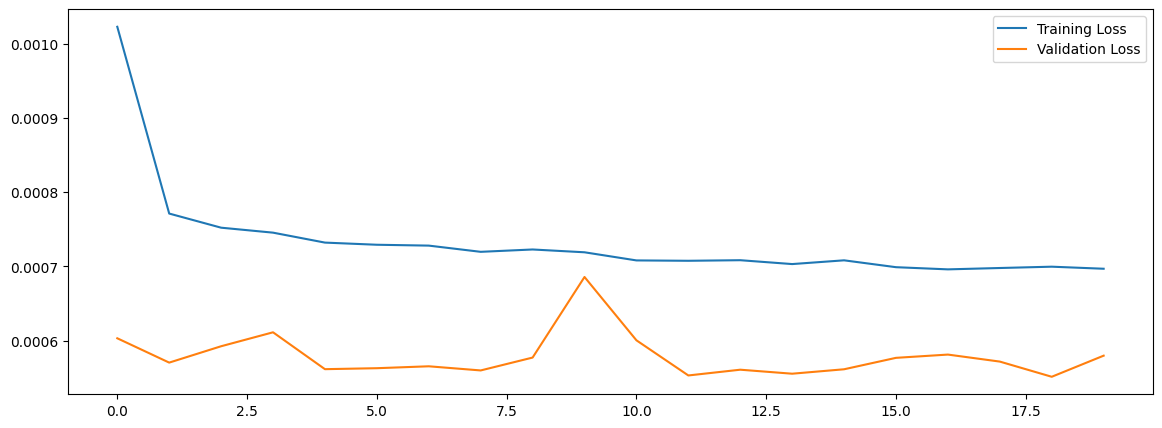

In [32]:
# Plot training history
plt.figure(figsize=(14, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

274/274 [==============================] - 1s 3ms/step


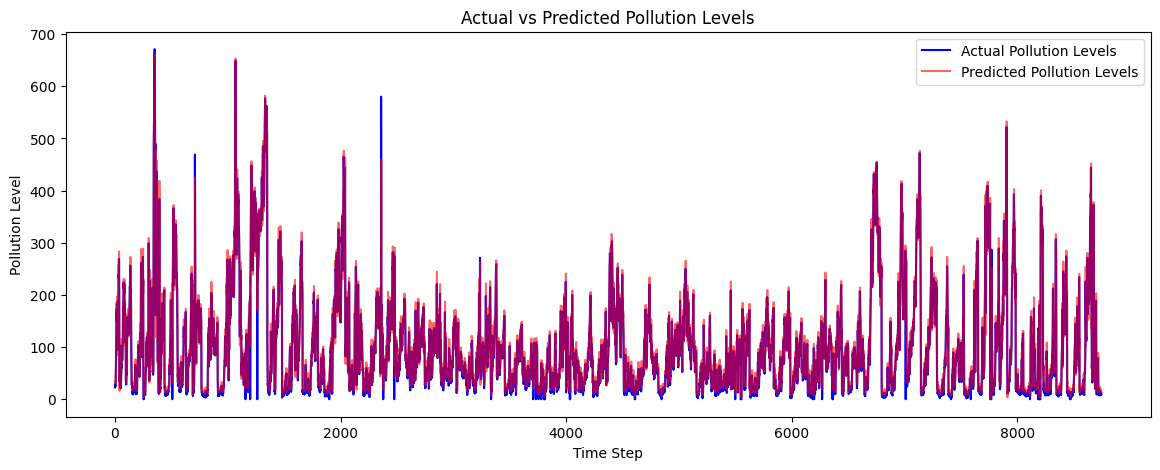

In [59]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

# Plot predictions vs actual values
plt.figure(figsize=(14, 5))
plt.plot(y_test_actual, label='Actual Pollution Levels', color='blue')
plt.plot(predictions, label='Predicted Pollution Levels', color='red', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted Pollution Levels')
plt.xlabel('Time Step')
plt.ylabel('Pollution Level')
plt.show()



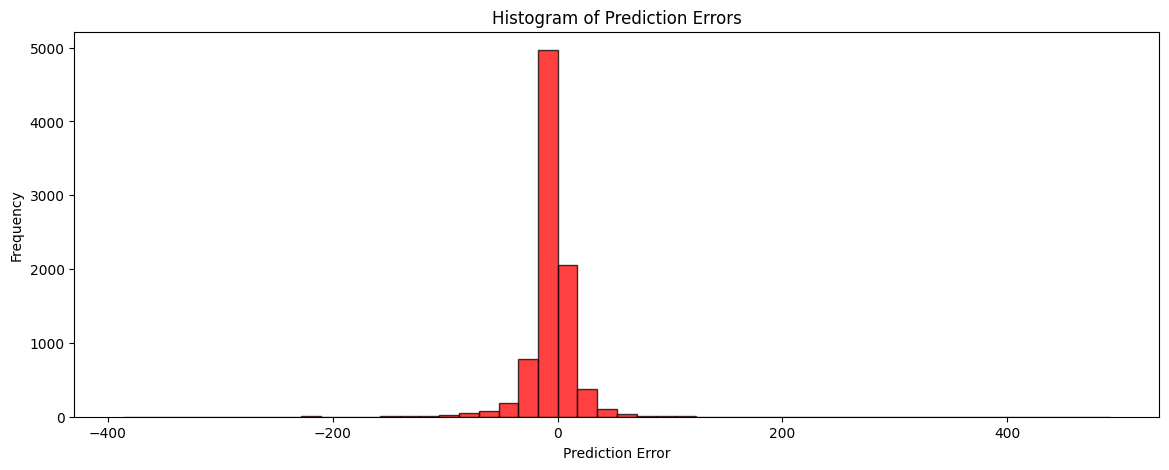

In [57]:
# Calculate errors
errors = y_test_actual - predictions

# Plot histogram of errors
plt.figure(figsize=(14, 5))
plt.hist(errors, bins=50, alpha=0.75, color='red', edgecolor='black')
plt.title('Histogram of Prediction Errors')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


In [41]:
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 572.9952625333116
Mean Absolute Error: 13.089843960612617
R-squared: 0.9346235693522199


In [43]:
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test_actual, predictions)
mae = mean_absolute_error(y_test_actual, predictions)
r2 = r2_score(y_test_actual, predictions)
# Define a function to calculate accuracy within a certain tolerance
def calculate_accuracy(actual, predicted, tolerance=0.10):
    within_tolerance = np.abs((actual - predicted) / actual) < tolerance
    accuracy = np.mean(within_tolerance) * 100
    return accuracy

# Calculate accuracy
tolerance = 0.10  # 10% tolerance
accuracy = calculate_accuracy(y_test_actual, predictions, tolerance)

print(f'Accuracy within ±{tolerance*100}%: {accuracy:.2f}%')



Accuracy within ±10.0%: 42.70%


C:\Users\aetpl\AppData\Local\Temp\ipykernel_8868\3157721498.py:9: RuntimeWarning: divide by zero encountered in divide
  within_tolerance = np.abs((actual - predicted) / actual) < tolerance


In [46]:
# Get the last sequence from the data
last_sequence = scaled_data[-seq_length:]
last_sequence = np.expand_dims(last_sequence, axis=0)  # Reshape to match model input

# Predict the next day's pollution level
next_day_prediction = model.predict(last_sequence)
next_day_prediction = scaler.inverse_transform(np.concatenate([next_day_prediction, np.zeros((next_day_prediction.shape[0], scaled_data.shape[1] - 1))], axis=1))[:,0]

print(f'Predicted pollution level for the next day: {next_day_prediction[0]}')
# Get the actual pollution levels for the last seq_length days
last_actual = scaler.inverse_transform(scaled_data[-seq_length:, :])[:, 0]

1/1 [==============================] - 0s 16ms/step
Predicted pollution level for the next day: 18.61231705546379


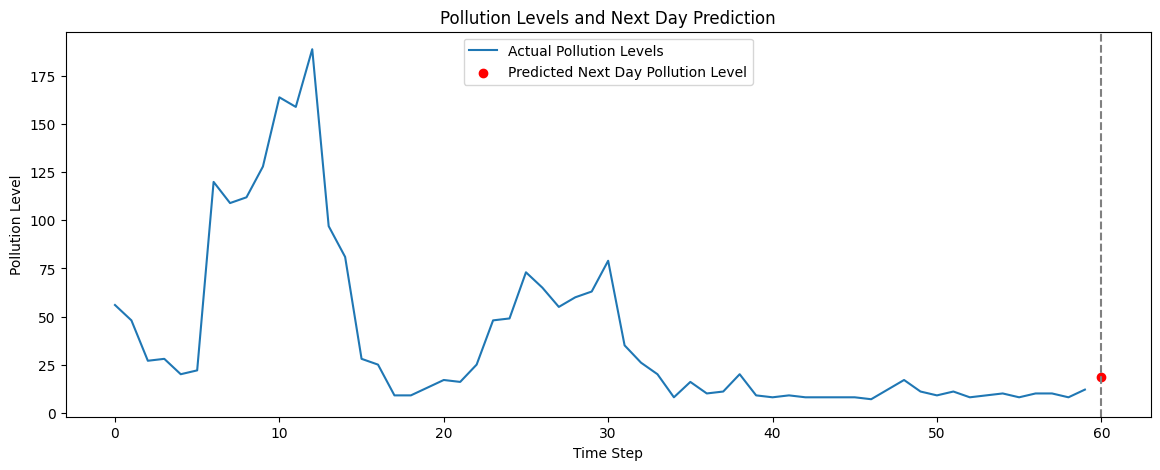

In [47]:
plt.figure(figsize=(14, 5))
plt.plot(range(seq_length), last_actual, label='Actual Pollution Levels')
plt.scatter(seq_length, next_day_prediction, color='red', label='Predicted Next Day Pollution Level')
plt.axvline(x=seq_length, color='gray', linestyle='--')
plt.legend()
plt.title('Pollution Levels and Next Day Prediction')
plt.xlabel('Time Step')
plt.ylabel('Pollution Level')
plt.show()